In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"clean-boatos.org-2022-12-19.csv", encoding="utf-8")
data['Length'] = data['title'].apply(len)
data.groupby('Length').describe().head(20)

Unnamed: 0                                                             \
            count         mean         std     min      25%     50%      75%   
Length                                                                         
35            2.0   729.500000    0.707107   729.0   729.25   729.5   729.75   
38            2.0   389.500000    0.707107   389.0   389.25   389.5   389.75   
41            2.0   569.500000    0.707107   569.0   569.25   569.5   569.75   
42            1.0   140.000000         NaN   140.0   140.00   140.0   140.00   
46            1.0  1186.000000         NaN  1186.0  1186.00  1186.0  1186.00   
47            8.0   876.875000  424.771682   117.0   545.00  1163.0  1168.25   
48            5.0   746.200000  409.796535   404.0   405.00   540.0  1190.00   
49            1.0   585.000000         NaN   585.0   585.00   585.0   585.00   
50            5.0   611.600000  370.955253   302.0   303.00   509.0   761.00   
51            6.0   463.666667  261.417418   269.0   270.25   326.0   667.50   
52            6.0   649.000000  462.157116   179.0   245.75   580.0  1065.75   
53            6.0   259.500000  123.221346   188.0   189.25   190.5   278.00   
54            4.0   807.250000  290.426554   408.0   684.00   899.0  1022.25   
55            7.0   491.857143  438.449324    28.0   121.00   541.0   724.00   
56            9.0   410.888889  272.769795   130.0   185.00   350.0   436.00   
57            6.0   573.500000  517.027949   133.0   136.50   397.5  1054.50   
58           18.0   758.111111  268.433777   254.0   544.25   835.0   886.25   
59           14.0   656.214286  192.131437   357.0   531.00   688.0   827.75   
60           22.0   667.090909  438.686775    26.0   161.25   846.5  1024.25   
61           14.0   822.714286  238.998368   334.0   691.25   781.5   994.75   

               Unnamed: 6                                     
           max      count mean  std  min  25%  50%  75%  max  
Length                                                        
35       730.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
38       390.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
41       570.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
42       140.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
46      1186.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
47      1189.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
48      1192.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
49       585.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50      1183.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
51       828.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
52      1193.0        2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
53       492.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
54      1023.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
55      1184.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
56       879.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
57      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
58      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59       893.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
60      1185.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
61      1187.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [47]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
0,0,https://www.boatos.org/saude/morte-subita-died...,2022-11-30 13:18:17,"""Morte Súbita (died suddenly) O Fim da Farsa"" ...",“MORTE SÚBITA (DIED SUDDENLY) COMPARTILHE ESSE...,1,NaN,77
1,2,https://www.boatos.org/saude/mascaras-contamin...,2022-11-19 12:34:22,Máscaras contaminadas estão chegando da China ...,MÁSCARAS CONTAMINADAS DA CHINA CHEGANDO PRA ...,1,NaN,80
2,3,https://www.boatos.org/saude/teste-covid-19-ja...,2022-11-16 19:01:17,Teste de Covid-19 já vem infectado com vírus n...,Transcrição: Uma coisa no teste de covid. É um...,1,NaN,71
3,4,https://www.boatos.org/saude/criador-vacina-pf...,2022-11-16 15:55:15,"Criador da vacina da Pfizer, Robert Malone rev...",O pronunciamento que o mundo não esperava: Cri...,1,NaN,114
4,5,https://www.boatos.org/saude/nova-onda-da-covi...,2022-11-12 11:55:02,Nova onda da Covid-19 com subvariantes da Ômic...,"Olá, sou médico sanitarista e a minha especial...",1,NaN,73


In [48]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
filtered_jan_jun_2022 = data.loc[(data['date'] >= '2020-01-26') & (data['date'] <= '2020-07-01')]
filtered_jan_jun_2022

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
815,1089,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,Luciano Huck está comprando votos para 2022 po...,“O cara de pau do Luciano Hulk está à solta di...,1,NaN,67
816,1090,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,Luciano Huck está comprando votos para 2022 po...,“DENÚNCIA GRAVÍSSIMA !!!!Começou o cadastrame...,1,NaN,67
817,1091,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,Luciano Huck está comprando votos para 2022 po...,“E o Luciano Huck oferecendo dinheiro já pen...,1,NaN,67
818,1092,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,Luciano Huck está comprando votos para 2022 po...,“REDE GLOBO AJUDANDO LUCIANO HUCK A COMPRAR V...,1,NaN,67
819,1094,https://www.boatos.org/religiao/chico-xavier-p...,2020-06-27 14:31:51,Chico Xavier previu pandemia do coronavírus em...,Pandemia… Desencarne… Nova Era.… Para quem ain...,1,NaN,95
...,...,...,...,...,...,...,...,...
1293,1193,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,Sopa de morcego que foi consumida em Wuhan (Ch...,“QUE TAL? A disseminação do coronavírus entre...,1,NaN,76
1294,1194,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,Sopa de morcego que foi consumida em Wuhan (Ch...,“SOPA DE MORCEGO | Vídeos de pessoas comend...,1,NaN,76
1295,1195,https://www.boatos.org/saude/diretor-do-hc-pre...,2020-01-27 21:51:19,"Diretor do HC, preocupado com nova gripe, reco...",Diretor do HC (Hospital das Clínicas) preocup...,1,NaN,89
1296,1185,https://www.boatos.org/saude/coronavirus-10-mi...,2020-01-26 14:28:59,Coronavírus tem 10 mil casos confirmados Brasi...,URGENTE: VÍRUS DA CHINA ( CORONAVÍRUS) 10 MIL...,1,NaN,70


In [49]:
import re
import nltk
nltk.download('punkt')
from nltk import tokenize 
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="portuguese")

filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(word_tokenize)
filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))
filtered_jan_jun_2022['title']


[nltk_data] Downloading package punkt to /home/daniela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_7559/1082613495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(word_tokenize)
/tmp/ipykernel_7559/1082613495.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_jun_2022['title'] = filtered_jan_jun_2022['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))


815     lucian huck está compr vot par 2022 por mei do...
816     lucian huck está compr vot par 2022 por mei do...
817     lucian huck está compr vot par 2022 por mei do...
818     lucian huck está compr vot par 2022 por mei do...
819     chic xavi prev pandem do coronavírus em mensag...
                              ...                        
1293    sop de morceg que foi consum em wuhan ( chin )...
1294    sop de morceg que foi consum em wuhan ( chin )...
1295    diretor do hc , preocup com nov grip , recomen...
1296    coronavírus tem 10 mil cas confirm brasil e 28...
1297    coronavírus tem 2,8 milhõ de infect e mat 112 ...
Name: title, Length: 483, dtype: object

In [50]:
import texthero as hero # text hero  
filtered_jan_jun_2022["PCA"] = (
            filtered_jan_jun_2022['title']
            .pipe(hero.clean)
            .pipe(hero.tfidf) # term frequency and inverse document frequency 
            .pipe(hero.pca)
)

/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:693: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()
/home/daniela/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

In [51]:
filtered_jan_jun_2022

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length,PCA
815,1089,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,lucian huck está compr vot par 2022 por mei do...,“O cara de pau do Luciano Hulk está à solta di...,1,NaN,67,"[-1.6197275307513432, 1.805607009638576]"
816,1090,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,lucian huck está compr vot par 2022 por mei do...,“DENÚNCIA GRAVÍSSIMA !!!!Começou o cadastrame...,1,NaN,67,"[-1.6197275307513432, 1.8056070096385786]"
817,1091,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,lucian huck está compr vot par 2022 por mei do...,“E o Luciano Huck oferecendo dinheiro já pen...,1,NaN,67,"[-1.6197275307513412, 1.8056070096385812]"
818,1092,https://www.boatos.org/entretenimento/luciano-...,2020-06-29 13:54:03,lucian huck está compr vot par 2022 por mei do...,“REDE GLOBO AJUDANDO LUCIANO HUCK A COMPRAR V...,1,NaN,67,"[-1.619727530751343, 1.8056070096385748]"
819,1094,https://www.boatos.org/religiao/chico-xavier-p...,2020-06-27 14:31:51,chic xavi prev pandem do coronavírus em mensag...,Pandemia… Desencarne… Nova Era.… Para quem ain...,1,NaN,95,"[0.5194516681383201, -1.8034152149818206]"
...,...,...,...,...,...,...,...,...,...
1293,1193,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,sop de morceg que foi consum em wuhan ( chin )...,“QUE TAL? A disseminação do coronavírus entre...,1,NaN,76,"[1.494743175850894, -1.084498640560869]"
1294,1194,https://www.boatos.org/mundo/sopa-morcego-wuha...,2020-01-28 23:18:24,sop de morceg que foi consum em wuhan ( chin )...,“SOPA DE MORCEGO | Vídeos de pessoas comend...,1,NaN,76,"[1.494743175850894, -1.084498640560869]"
1295,1195,https://www.boatos.org/saude/diretor-do-hc-pre...,2020-01-27 21:51:19,"diretor do hc , preocup com nov grip , recomen...",Diretor do HC (Hospital das Clínicas) preocup...,1,NaN,89,"[0.10479633416648038, -0.8201765032718944]"
1296,1185,https://www.boatos.org/saude/coronavirus-10-mi...,2020-01-26 14:28:59,coronavírus tem 10 mil cas confirm brasil e 28...,URGENTE: VÍRUS DA CHINA ( CORONAVÍRUS) 10 MIL...,1,NaN,70,"[0.45155028631573413, -0.6247471636780212]"


# K-MEANS


In [52]:
filtered_jan_jun_2022['PCA']

815       [-1.6197275307513432, 1.805607009638576]
816      [-1.6197275307513432, 1.8056070096385786]
817      [-1.6197275307513412, 1.8056070096385812]
818       [-1.619727530751343, 1.8056070096385748]
819      [0.5194516681383201, -1.8034152149818206]
                           ...                    
1293       [1.494743175850894, -1.084498640560869]
1294       [1.494743175850894, -1.084498640560869]
1295    [0.10479633416648038, -0.8201765032718944]
1296    [0.45155028631573413, -0.6247471636780212]
1297    [0.8668712098296325, -0.06861572420321245]
Name: PCA, Length: 483, dtype: object

In [53]:
finalModel = filtered_jan_jun_2022['PCA']
finalModel = np.array((list(finalModel)))
finalModel

array([[-1.61972753e+00,  1.80560701e+00],
       [-1.61972753e+00,  1.80560701e+00],
       [-1.61972753e+00,  1.80560701e+00],
       [-1.61972753e+00,  1.80560701e+00],
       [ 5.19451668e-01, -1.80341521e+00],
       [-2.85224084e+00, -9.05867915e-01],
       [-2.85224084e+00, -9.05867915e-01],
       [ 9.29446870e-01,  1.62055572e-01],
       [-1.15323638e+00, -2.38258735e-01],
       [-6.95035149e-02, -6.40959301e-01],
       [-6.13316334e-01, -1.86945204e-01],
       [-1.73002925e+00,  1.24675628e+00],
       [-1.15850904e-01, -1.49460240e-01],
       [-1.03294765e+00,  6.60144008e-01],
       [ 5.71215643e-01, -4.31006307e-01],
       [ 3.92928104e-01, -9.60625055e-01],
       [ 3.92928104e-01, -9.60625055e-01],
       [-1.05691203e-01, -7.00494442e-01],
       [-8.41431556e-01, -8.68144904e-01],
       [-2.40278685e-01, -8.95784082e-01],
       [-1.52662987e+00,  9.08433541e-01],
       [ 1.30618714e+00, -9.30370739e-01],
       [-4.41653350e-01, -1.44213362e+00],
       [-4.

In [54]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(finalModel)
    kmeanModel.fit(finalModel)
  
    distortions.append(sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / finalModel.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / finalModel.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.04274216580816
2 : 1.7785415062751055
3 : 1.3772598604640447
4 : 1.1679694115833104
5 : 1.0240419637682825
6 : 0.9127044269953954
7 : 0.8202475019402149
8 : 0.7638592816971781
9 : 0.7312912566092539


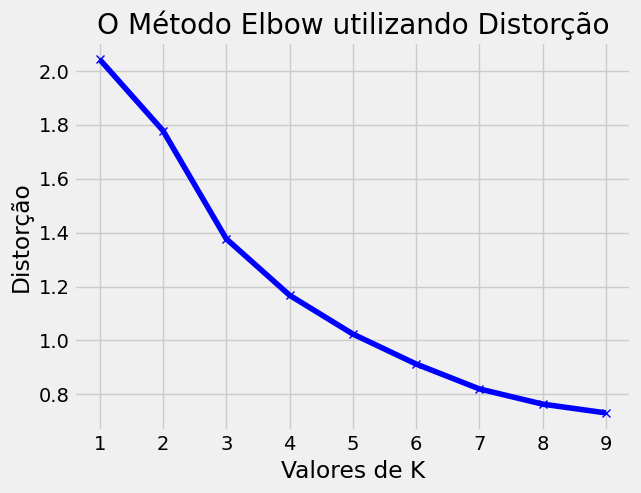

In [55]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('O Método Elbow utilizando Distorção')
plt.show()

In [56]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 3928.702807234662
2 : 2426.2737353798893
3 : 1387.4645305495937
4 : 964.0194777794642
5 : 717.7912848169817
6 : 557.373365421405
7 : 464.609489135555
8 : 393.253311037088
9 : 331.5386075616344


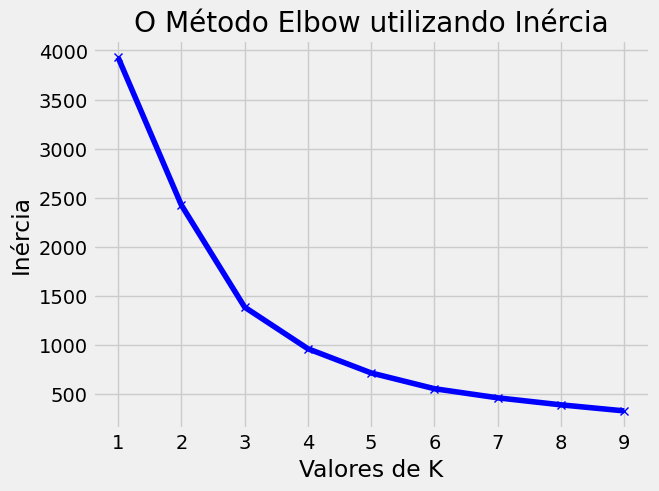

In [57]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O Método Elbow utilizando Inércia')
plt.show()

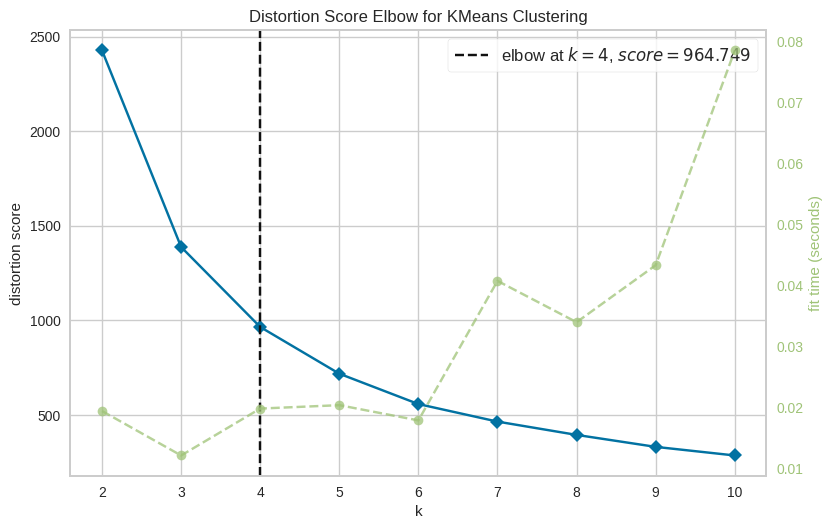

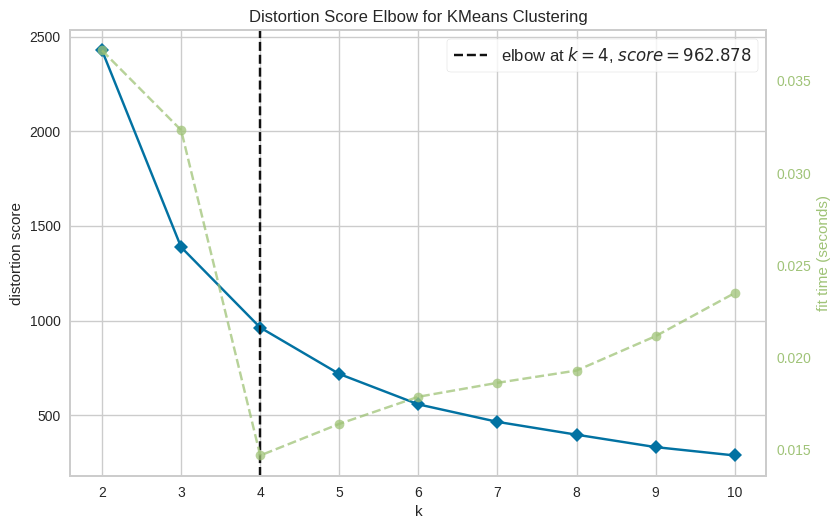

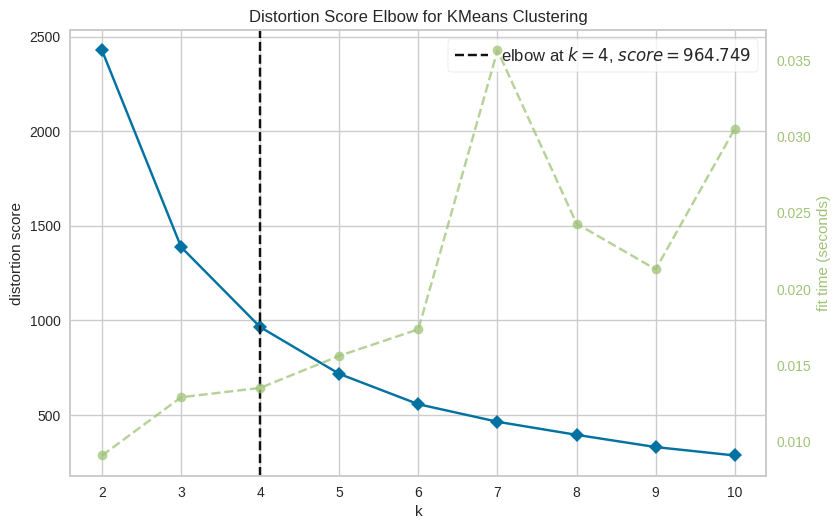

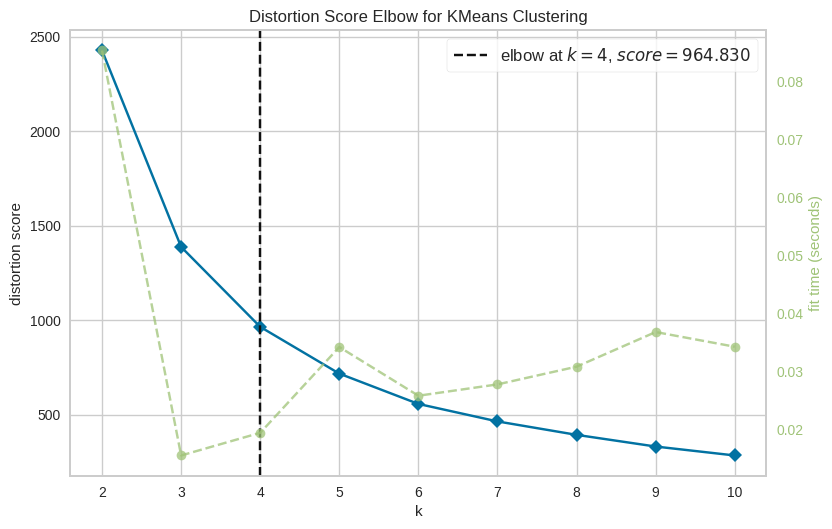

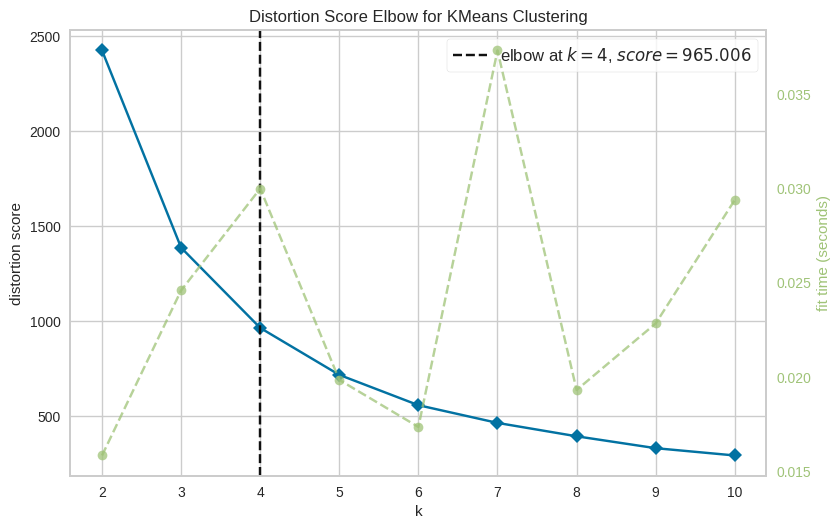

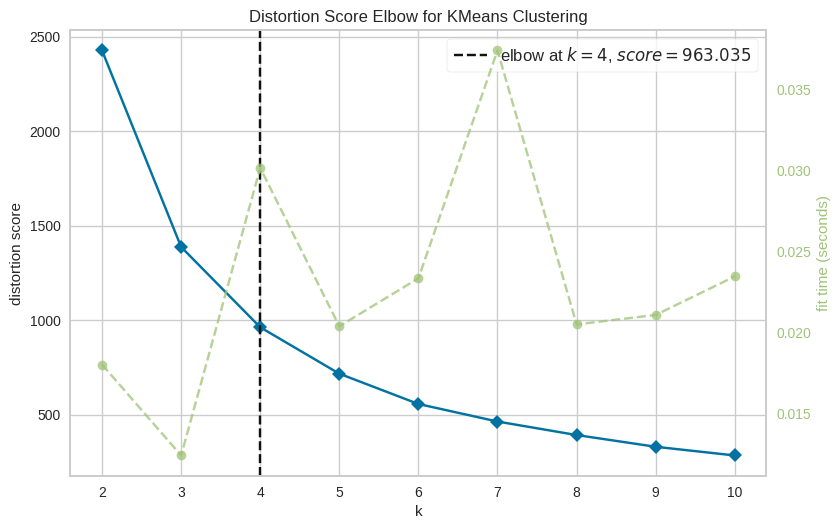

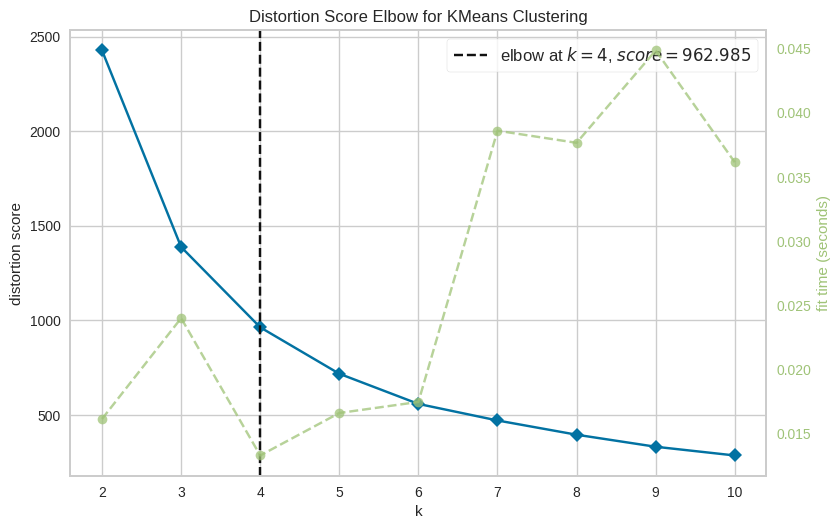

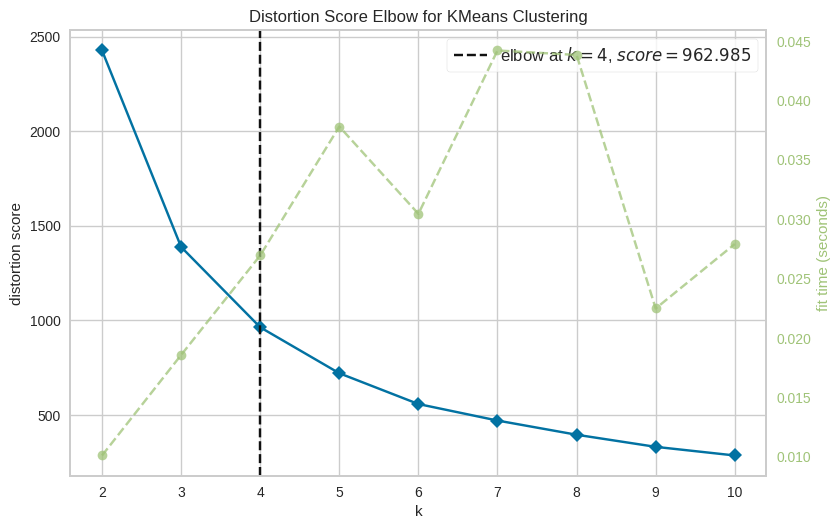

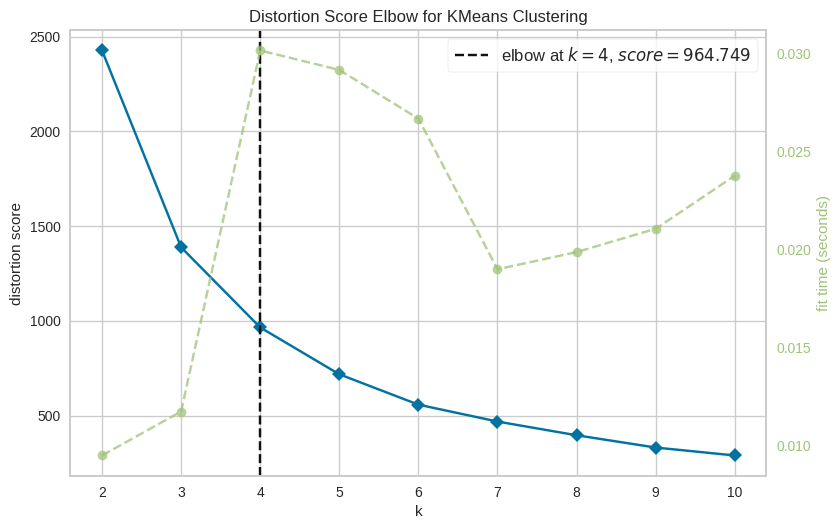

In [60]:
from yellowbrick.cluster import KElbowVisualizer

silModel = filtered_jan_jun_2022['PCA']
silModel = np.array((list(silModel)))
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(silModel)
    elb_visualizer = KElbowVisualizer(kmeanModel)
    elb_visualizer.fit(silModel)    
    elb_visualizer.show()  

## k = 4

[0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 2 3 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 3 3 3 0 2 3 2 0 0 0 3 2 2 0 0 0 0 2
 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 3 0 0 0 0 3 0 0 0 0 2 2 0
 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 3 2 0 2 2 2 2 0 0 0 2 0 2 0 0 0 0 0
 0 0 0 3 3 0 0 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 0 3 3 3 3 3 3 0 0 0 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 2 2 0 2 2
 2 0 0 3 0 0 0 2 2 2 2 2 0 2 0 0 0 0 0 2 0 0 3 0 2 2 3 3 2 3 3 3 3 0 2 2 0
 0 2 2 3 3 3 3 2 2 0 0 2 2 2 2 0 0 0 2 0 2 2 1 1 1 1 1 1 1 1 1 0 2 2 2 2 3
 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 2 0 2 2 0 3 3 3 3 2 2 0 2 2 2 0 0 0 2 0
 0 2 2 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 2 0 0 0 0 2 2 0 0 0 2 2 2 2 0 0 2 0 2 0 0
 3 0 0 2 0 2 2 0 2 2 2 2 0 2 0 0 0 0 2 2 2 2 0 0 0 2 2 2 0 2 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 0 0 0 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 0 2 0 2 2 2
 2 2]


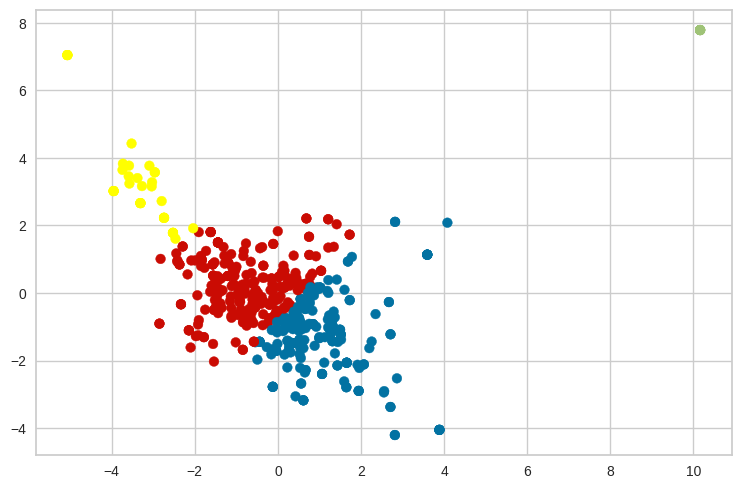

In [61]:
finalModel2 = filtered_jan_jun_2022['PCA']
finalModel2 = np.array((list(finalModel)))
finalModel2

kmeanModel2 = KMeans(n_clusters=4).fit(finalModel2)
kmeanModel2.fit(finalModel2)

print(kmeanModel2.labels_)


LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeanModel2.labels_]
plt.scatter(finalModel2[:,0], finalModel2[:,1], c=label_color)

In [62]:
# results=kmeanModel2.labels_.reshape(kmeanModel2.labels_.shape[0],1)
# results = np.array(((results)))
# results
kmeanModel2.labels_

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 2, 3, 2, 0, 0, 0,
       3, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 3, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 3, 0, 2, 2, 3, 3, 2, 3, 3, 3, 3, 0, 2, 2, 0, 0, 2, 2, 3, 3,
       3, 3, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0,

In [63]:
array2 = np.array((list(filtered_jan_jun_2022["title"])))
array2

array(['lucian huck está compr vot par 2022 por mei do zap do bem',
       'lucian huck está compr vot par 2022 por mei do zap do bem',
       'lucian huck está compr vot par 2022 por mei do zap do bem',
       'lucian huck está compr vot par 2022 por mei do zap do bem',
       'chic xavi prev pandem do coronavírus em mensag sobr desencarn colet e nov era',
       'rom zem acab de decret estad de calam em min ger por caus de covid-19 , mostr víd',
       'rom zem acab de decret estad de calam em min ger por caus de covid-19 , mostr víd',
       'policial invad necrotéri par salv sua mã que estav com covid-19 , em um sac e respir',
       'govern federal decret proibiçã de aul presenc em tod brasil',
       'italian de 93 anos chor ao sab de dív com hospital após se cur da covid-19',
       'másc ajud o coronavírus a se espalh por caus do gás carbôn e só dev ser usad par convers',
       'institut maurici de sous está doand o sup almanaqu turm da mônic em sit no whatsapp',
       'joã d

In [64]:
pred_classes = kmeanModel2.predict(finalModel2)
pred_classes = list(pred_classes)

dictionaryPrime = dict(zip(filtered_jan_jun_2022["title"], pred_classes))
dictionaryPrime

{'lucian huck está compr vot par 2022 por mei do zap do bem': 0,
 'chic xavi prev pandem do coronavírus em mensag sobr desencarn colet e nov era': 2,
 'rom zem acab de decret estad de calam em min ger por caus de covid-19 , mostr víd': 0,
 'policial invad necrotéri par salv sua mã que estav com covid-19 , em um sac e respir': 2,
 'govern federal decret proibiçã de aul presenc em tod brasil': 0,
 'italian de 93 anos chor ao sab de dív com hospital após se cur da covid-19': 0,
 'másc ajud o coronavírus a se espalh por caus do gás carbôn e só dev ser usad par convers': 0,
 'institut maurici de sous está doand o sup almanaqu turm da mônic em sit no whatsapp': 0,
 'joã dor test posit par covid-19 ( nov coronavírus )': 0,
 'atest de óbit com suspeit de covid-19 rend r $ 18.000 par o hospital , diz médic': 0,
 'pastor na itál reabr igrej com fot de fié que morr de covid-19': 2,
 '1720 , 1820 , 1920 e 2020 : a cad 100 anos , exat , uma pandem assol a human': 2,
 'bet pret , secretári de saúd d

In [65]:
clusterOneWords = [k for k, v in dictionaryPrime.items() if v == 0]
clusterOneWords


['lucian huck está compr vot par 2022 por mei do zap do bem',
 'rom zem acab de decret estad de calam em min ger por caus de covid-19 , mostr víd',
 'govern federal decret proibiçã de aul presenc em tod brasil',
 'italian de 93 anos chor ao sab de dív com hospital após se cur da covid-19',
 'másc ajud o coronavírus a se espalh por caus do gás carbôn e só dev ser usad par convers',
 'institut maurici de sous está doand o sup almanaqu turm da mônic em sit no whatsapp',
 'joã dor test posit par covid-19 ( nov coronavírus )',
 'atest de óbit com suspeit de covid-19 rend r $ 18.000 par o hospital , diz médic',
 'bet pret , secretári de saúd do paran , escrev mensag sobr pic da pandem',
 'brun cov está usand cloroquin contr a covid-19 e só agor liber o remédi em sã paul',
 'senegal só tem cinc mort por coronavírus e usa cloroquin em tod pacient',
 'pf encontr dinheir escond no forr do tet da cas do secretári de saúd da paraíb ( par ) , mostr víd',
 'filh de aldir blanc grav víd alert par cor

## Word Cloud for first cluster n = 0

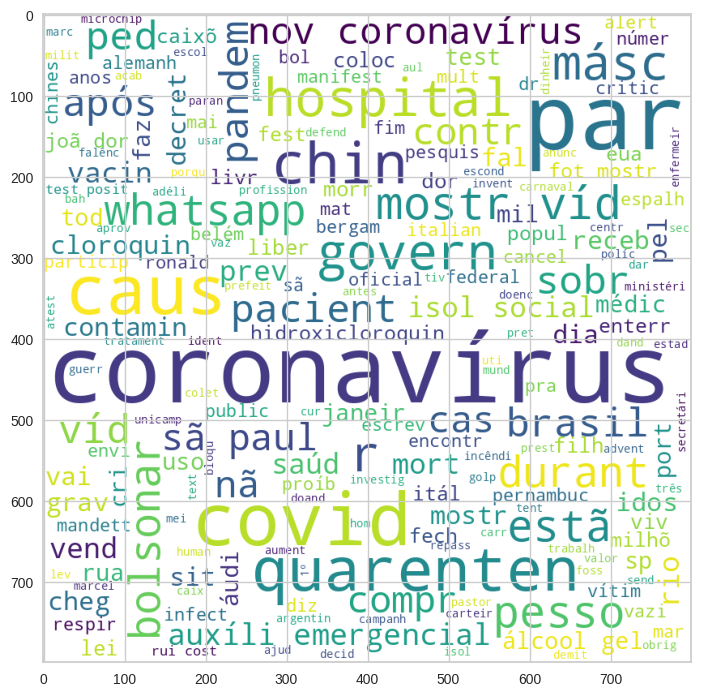

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']
unique_string=(" ").join(clusterOneWords)
wordCloudOne = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudOne)


## Word Cloud for second cluster n = 1

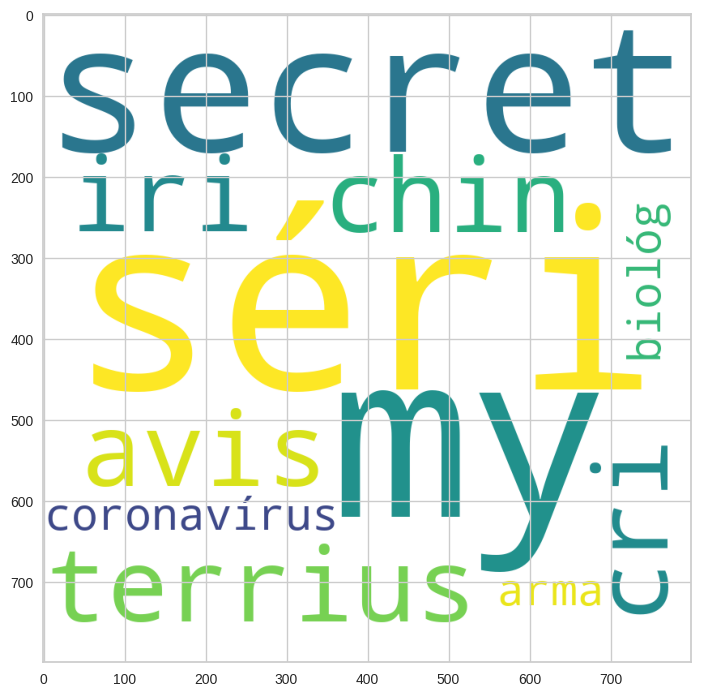

In [67]:
clusterTwoWords = [k for k, v in dictionaryPrime.items() if v == 1]

unique_string2=(" ").join(clusterTwoWords)
wordCloudTwo = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudTwo)

## Word Cloud for third cluster n = 2

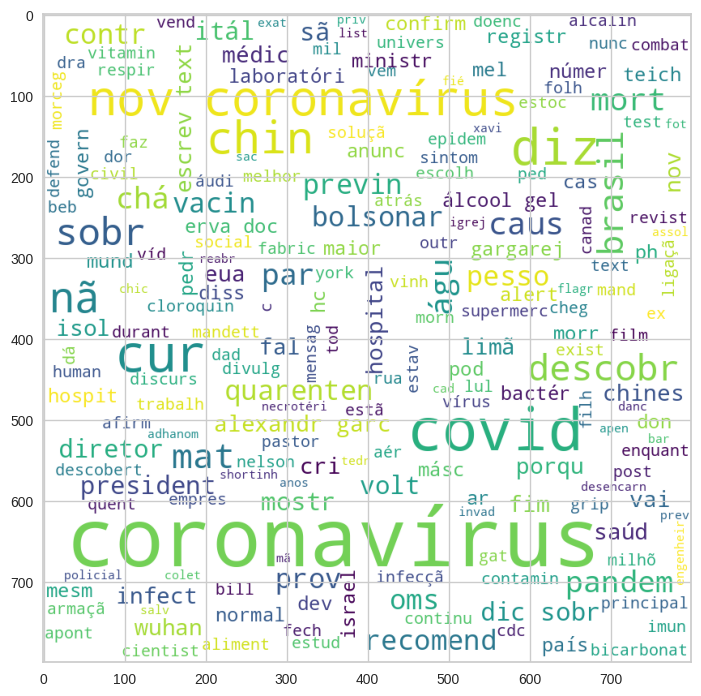

In [68]:
clusterThreeWords = [k for k, v in dictionaryPrime.items() if v == 2]

unique_string3=(" ").join(clusterThreeWords)

wordCloudThree = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudThree)


## Word Cloud for fourth cluster n = 3

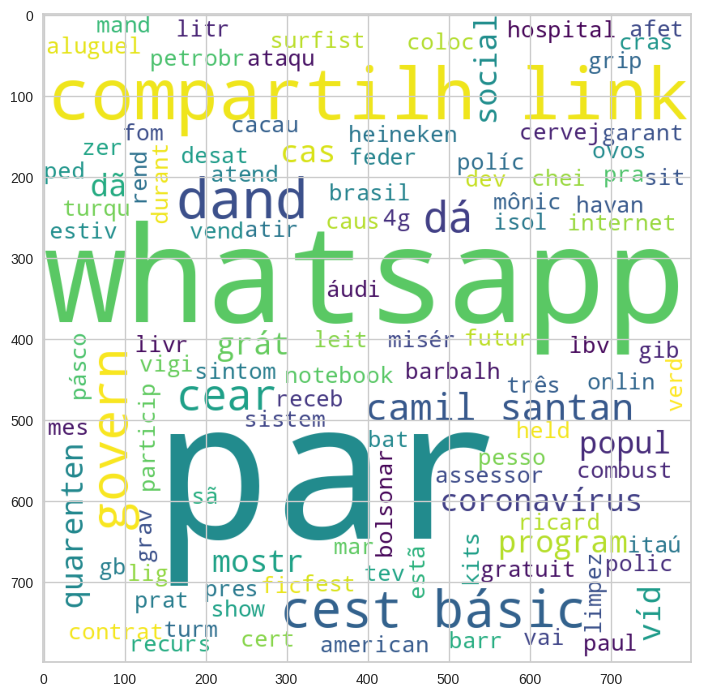

In [69]:
clusterFourWords = [k for k, v in dictionaryPrime.items() if v == 3]

unique_string4=(" ").join(clusterFourWords)

wordCloudFour = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string4)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFour)